In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 월드컵 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/worldCup/WorldCups.csv")
df

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375000
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Russia,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


In [ ]:
# Year 와 Attendance 칼럼만 추출하여 출력 => 역대 월드컵 관중 수를 추출할 수 있다.
spectators = df[['Year', 'Attendance']]
spectators

,Year,Attendance
0,1930,590549
1,1934,363000
2,1938,375000
3,1950,1045246
4,1954,768607
5,1958,819810
6,1962,893172
7,1966,1563135
8,1970,1603975
9,1974,1865753


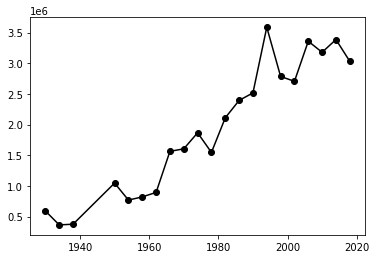

In [ ]:
# 역대 월드컵의 평균 관중 수를 그래프로 출력하기 => matplotlib을 이용 
plt.plot(spectators['Year'], spectators['Attendance'], marker='o', color='black')

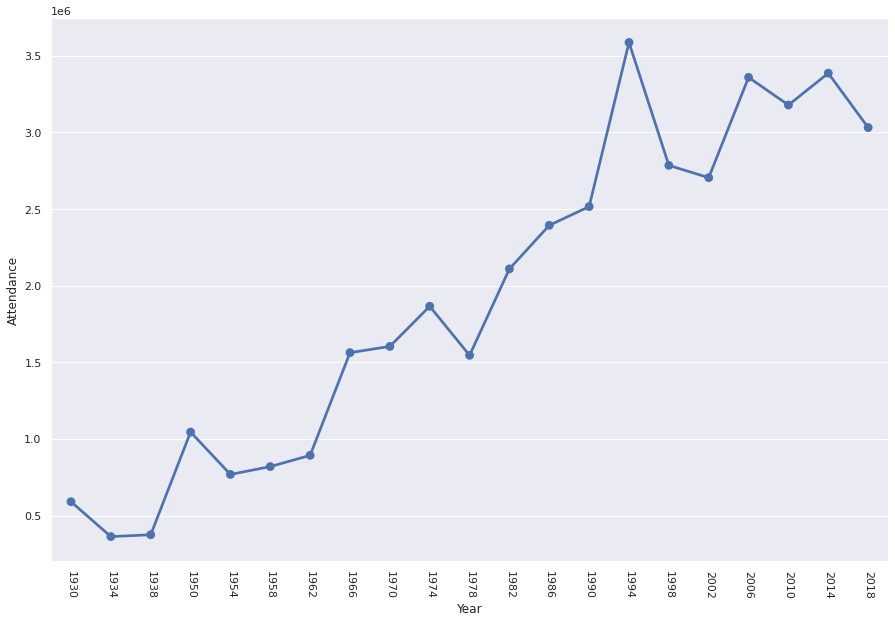

In [ ]:
# 역대 월드컵의 평균 관중 수를 그래프로 출력하기 => seaborn을 이용
import seaborn as sns
plt.figure(figsize=(15,10))
# 한글 출력을 위해서 폰트 옵션을 설정.
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.pointplot(x="Year", y='Attendance',data=spectators)
plt.xticks(rotation=270)
plt.show()

In [ ]:
# 역대 월드컵의 경기당 득점 수 => 'Year','GoalsScored','MatchesPlayed'만 출력 
df = df[['Year', 'GoalsScored','MatchesPlayed']]
df

,Year,GoalsScored,MatchesPlayed
0,1930,70,18
1,1934,70,17
2,1938,84,18
3,1950,88,22
4,1954,140,26
5,1958,126,35
6,1962,89,32
7,1966,89,32
8,1970,95,32
9,1974,97,38


In [ ]:
# df에 경기당 득점 수를 의미하는 새로운 칼럼 GoalsPerMatch를 추가
df['GoalsPerMatch'] = df['GoalsScored']/df['MatchesPlayed']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,GoalsScored,MatchesPlayed,GoalsPerMatch
0,1930,70,18,3.888889
1,1934,70,17,4.117647
2,1938,84,18,4.666667
3,1950,88,22,4.000000
4,1954,140,26,5.384615
5,1958,126,35,3.600000
6,1962,89,32,2.781250
7,1966,89,32,2.781250
8,1970,95,32,2.968750
9,1974,97,38,2.552632


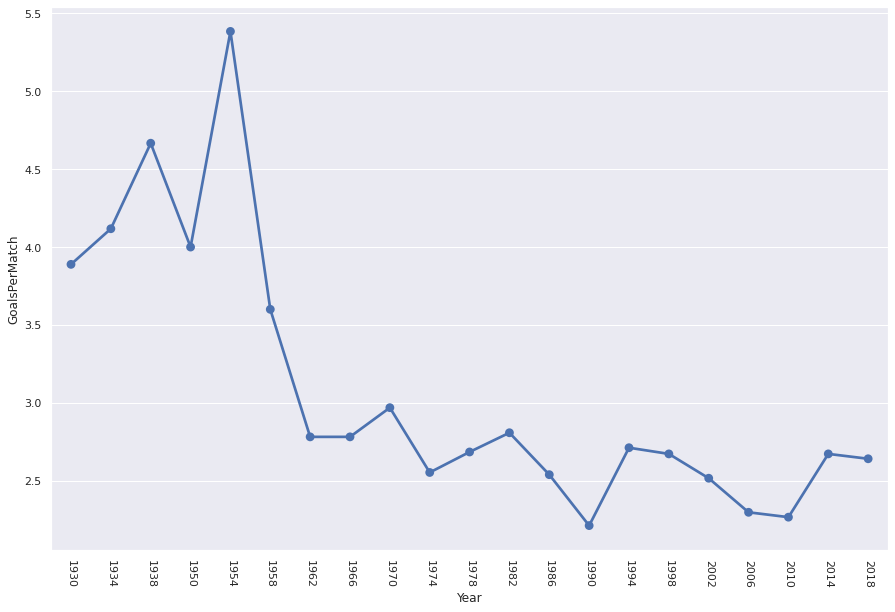

In [ ]:
# 역대 월드컵의 경기당 득점 수를 그래프로 출력하기(1) => seaborn을 이용
plt.figure(figsize=(15,10))
# 한글 출력을 위해서 폰트 옵션을 설정.
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.pointplot(x="Year", y='GoalsPerMatch',data=df)
plt.xticks(rotation=270)
plt.show()

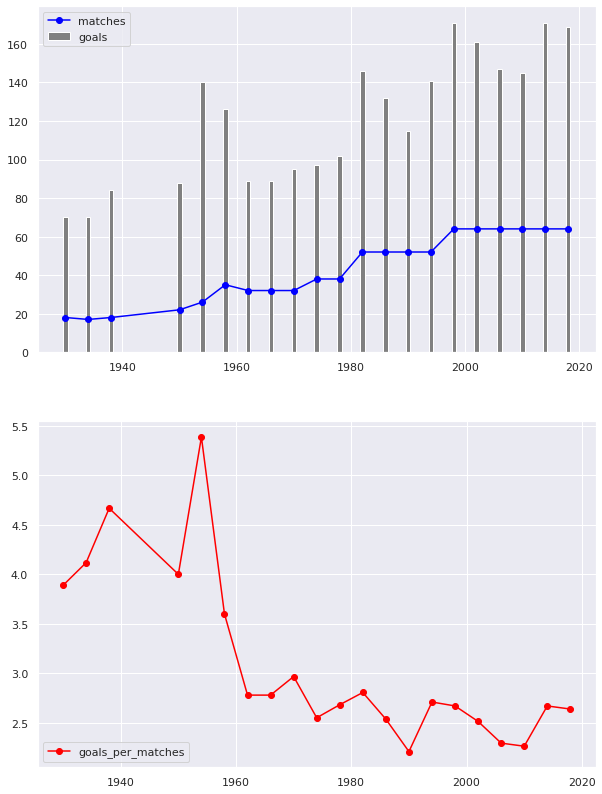

In [ ]:
# 역대 월드컵의 경기당 득점 수를 그래프로 출력하기(2) => matplotlib을 이용하여 경기 수의 변화도 같이 확인
fig, axes = plt.subplots(2, 1, figsize=(10,14))

axes[0].bar(x=df['Year'], height=df['GoalsScored'], color='grey', label='goals')
axes[0].plot(df['Year'], df['MatchesPlayed'], marker='o', color='blue', label='matches')
axes[0].legend(loc='upper left')

axes[1].grid(True)
axes[1].plot(df['Year'],df['GoalsPerMatch'], marker='o', color='red', label='goals_per_matches')
axes[1].legend(loc='lower left')

In [ ]:
# 월드컵 매치 데이터 불러오기
match_df = pd.read_csv("/content/drive/MyDrive/worldCup/WorldCupMatches.csv")
match_df 

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 결측값 있는 행 삭제
match_df = match_df.dropna(axis=0)
match_df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [ ]:
# 중복값 확인하기
dupli = match_df.duplicated() 
len(dupli[dupli==True])

15

In [ ]:
# 중복값 제거하기
match_df.drop_duplicates(inplace=True)
match_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL
832,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
833,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
834,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI


In [ ]:
# 이상한 나라 이름 확인하기
display(match_df[match_df['Home Team Name']=="Germany FR"].head(2),match_df[match_df['Home Team Name']=="Soviet Union"].head(2))

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
79,1954.0,17 Jun 1954 - 18:00,Group 2,Wankdorf Stadium,Berne,Germany FR,4.0,1.0,Turkey,,28000.0,1.0,1.0,DA COSTA VIEIRA Jose (POR),ZSOLT Istvan (HUN),MERLOTTI Armand (SUI),211.0,1283.0,FRG,TUR
91,1954.0,23 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Germany FR,7.0,2.0,Turkey,,17000.0,3.0,1.0,VINCENTI Raymond (FRA),FAULTLESS Charlie (SCO),DOERFLINGER Ernst (SUI),211.0,1284.0,FRG,TUR


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
102,1958.0,08 Jun 1958 - 19:00,Group 4,Nya Ullevi,Gothenburg,Soviet Union,2.0,2.0,England,,49348.0,1.0,0.0,ZSOLT Istvan (HUN),NILSEN Birger (NOR),JORGENSEN Carl Frederik (DEN),220.0,1372.0,URS,ENG
113,1958.0,11 Jun 1958 - 19:00,Group 4,Ryavallen,Boras,Soviet Union,2.0,0.0,Austria,,21239.0,1.0,0.0,JORGENSEN Carl Frederik (DEN),NILSEN Birger (NOR),ACKEBORN Gosta (SWE),220.0,1332.0,URS,AUT


In [ ]:
# 이상한 나라 이름 교체하기 
match_df.replace({"Germany FR":'Germany',
                            "C�te d'Ivoire": "Cote d'Ivoire",
                            "rn”>Bosnia and Herzegovina":'Bosnia and Herzegovina',
                            "rn”>Serbia and Montenegro": 'Serbia and Montenegro',
                            "rn”>Trinidad and Tobago": 'Trinidad and Tobago',
                            "rn”>United Arab Emirates": 'United Arab Emirates',
                            "Soviet Union": 'Russia'}, inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
# 이상한 나라 이름 확인하기
display(match_df[match_df['Home Team Name']=="Germany FR"].head(2),match_df[match_df['Home Team Name']=="Soviet Union"].head(2))

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials


In [ ]:
# 이상한 나라 이름 교체한것 확인하기
display(match_df[match_df['Home Team Name']=="Germany"].head(2),match_df[match_df['Home Team Name']=="Russia"].head(2))

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
22,1934.0,27 May 1934 - 16:30,Preliminary round,Giovanni Berta,Florence,Germany,5.0,2.0,Belgium,,8000.0,1.0,2.0,MATTEA Francesco (ITA),MELANDRI Ermenegildo (ITA),BAERT Jacques (FRA),204.0,1108.0,GER,BEL
27,1934.0,31 May 1934 - 16:30,Quarter-finals,San Siro,Milan,Germany,2.0,1.0,Sweden,,3000.0,0.0,0.0,BARLASSINA Rinaldo (ITA),MERCET Rene (SUI),VAN MOORSEL Johannes (NED),418.0,1129.0,GER,SWE


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
102,1958.0,08 Jun 1958 - 19:00,Group 4,Nya Ullevi,Gothenburg,Russia,2.0,2.0,England,,49348.0,1.0,0.0,ZSOLT Istvan (HUN),NILSEN Birger (NOR),JORGENSEN Carl Frederik (DEN),220.0,1372.0,URS,ENG
113,1958.0,11 Jun 1958 - 19:00,Group 4,Ryavallen,Boras,Russia,2.0,0.0,Austria,,21239.0,1.0,0.0,JORGENSEN Carl Frederik (DEN),NILSEN Birger (NOR),ACKEBORN Gosta (SWE),220.0,1332.0,URS,AUT
